#### The next code sets up the Python path to include the 'src' directory, which contains our custom modules and functions.
##### This is essential for importing our data processing utilities and other custom code.
# 
##### The cell handles two possible project structures:
 1. Standard structure: notebooks/ and src/ are siblings under the project root
 2. Alternative structure: src/ is directly under the current directory
# 
##### Key components:
  - os.getcwd(): Gets the current working directory (where the notebook is running)
  - os.path.join(): Creates platform-independent file paths
  - sys.path.append(): Adds the src directory to Python's module search path
  - os.path.exists(): Checks if the directory exists before adding it
#### This ensures that when we import custom modules later (like data processing functions),
#### Python can find them regardless of where the notebook is executed from.


In [1]:
import sys
import os
current_dir = os.getcwd()
src_path = os.path.join(current_dir, '..', 'src')
if os.path.exists(src_path):
    sys.path.append(src_path)
else:
    # Try alternative path structure
    alt_src_path = os.path.join(current_dir, 'src')
    if os.path.exists(alt_src_path):
        sys.path.append(alt_src_path)
    else:
        print("Warning: Could not find src directory. Please ensure the path is correct.")



#### Data Loading and Initial Exploration
# 
   - The code performs the critical task of loading our complaints dataset and conducting initial data exploration. Let's break down what happens:
# 
#### Data Loading Strategy
##### The code implements a robust data loading approach that handles multiple project structures:
  1. **Primary Path**: Looks for data in `../data/complaints.csv` (standard project structure)
  2. **Fallback Path**: Tries `./data/complaints.csv` (alternative structure)
  3. **Error Handling**: Gracefully handles missing files and loading errors
#### Key Components:
 *  **Path Construction**: Uses `os.path.join()` for cross-platform compatibility
 *  **Existence Checking**: `os.path.exists()` prevents file not found errors
 * **Exception Handling**: Try-catch blocks ensure the notebook continues even if data loading fails
 * **Status Reporting**: Clear feedback about where data was loaded from or what went wrong
# 
#### Data Validation and Display
##### Once loaded, the code provides essential information:
  - **Dataset dimensions**: Shape (rows × columns) for understanding data size
  - **Column names**: List of all available features/variables
  - **Sample data**: First 5 rows to preview the actual content
# 
#### Expected Output
##### The cell will display:
  - Loading status message with file path
  - Dataset shape 
  - Column list for feature identification
  - Preview of actual data values
# 
##### This foundational step is crucial for understanding what we're working with before proceeding to analysis.


In [2]:
import pandas as pd

# Load the complaints data
try:
    # Try to load from the data directory
    data_path = os.path.join(current_dir, '..', 'data', 'complaints.csv')
    if os.path.exists(data_path):
        complaints_df = pd.read_csv(data_path)
        print(f"Data loaded successfully from: {data_path}")
    else:
        # Try alternative path structure
        alt_data_path = os.path.join(current_dir, 'data', 'complaints.csv')
        if os.path.exists(alt_data_path):
            complaints_df = pd.read_csv(alt_data_path)
            print(f"Data loaded successfully from: {alt_data_path}")
        else:
            print("Error: Could not find complaints.csv in data directory")
            complaints_df = None
except Exception as e:
    print(f"Error loading data: {e}")
    complaints_df = None

# Display basic information about the loaded data
if complaints_df is not None:
    print(f"\nDataset shape: {complaints_df.shape}")
    print(f"Columns: {list(complaints_df.columns)}")
    print(f"\nFirst few rows:")
    print(complaints_df.head())
else:
    print("No data loaded. Please check the file path and try again.")

C:\Users\W-HP\AppData\Local\Temp\ipykernel_9976\3166309238.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints_df = pd.read_csv(data_path)


Data loaded successfully from: d:\10Acadamy\Intelligent-Complaint-Analysis-for-Financial-Services\notebooks\..\data\complaints.csv

Dataset shape: (9609797, 18)
Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

First few rows:
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  

# 
#### Import and Setup Analysis Tools
# 
-  This cell prepares the analysis environment by importing the custom `ComplaintAnalyzer` class that contains all the EDA and preprocessing methods we'll use throughout this notebook.
# 
#### What this cell does:
 - **Primary import**: Attempts to import `ComplaintAnalyzer` from the `eda_preprocessing` module
 - **Fallback mechanism**: Uses `importlib` as a backup method if the primary import fails
 - **Error handling**: Ensures the analysis tools are available before proceeding
# 
#### Expected Output
##### The cell will either:
   - Successfully import the analysis tools (no visible output)
   - Display import errors if the module cannot be found
# 
##### This setup step is essential for the subsequent analysis cells to function properly.


In [3]:
# Primary import method
from eda_preprocessing import ComplaintAnalyzer

# Fallback import method using importlib
import importlib.util
spec = importlib.util.spec_from_file_location("eda_preprocessing", data_path)

## Data Processing Pipeline Execution
# # 
#### This cell executes the complete data processing pipeline using the ComplaintAnalyzer class.

#### What this cell does:
  - **Step 1**: Performs initial exploratory data analysis on the raw dataset
  - **Step 2**: Visualizes product distribution to understand data composition
  - **Step 3**: Analyzes narrative lengths to identify text quality patterns
  - **Step 4**: Counts narrative presence to assess data completeness
  - **Step 5**: Filters the dataset to specific products and removes empty narratives
  - **Step 6**: Cleans narratives to improve embedding quality for downstream analysis
# # 
 #### Expected Output:
  - Comprehensive EDA results including data shape, column information, and sample data
  - Product distribution visualizations (bar charts and pie charts)
  - Narrative length statistics and distribution plots
  - Data filtering results showing reduction in dataset size
  - Final summary comparing original vs processed dataset dimensions

 #### Key Metrics:
  - Original dataset size vs filtered size vs cleaned size
  - Percentage of data reduction after processing
  - Quality metrics for narrative text
 
 #### This cell is the core processing step that transforms raw complaint data into a clean, analysis-ready format.


DataFrame set with shape: (9609797, 18)
=== STEP 1: Initial Exploratory Data Analysis ===

--- Data Head ---
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer com

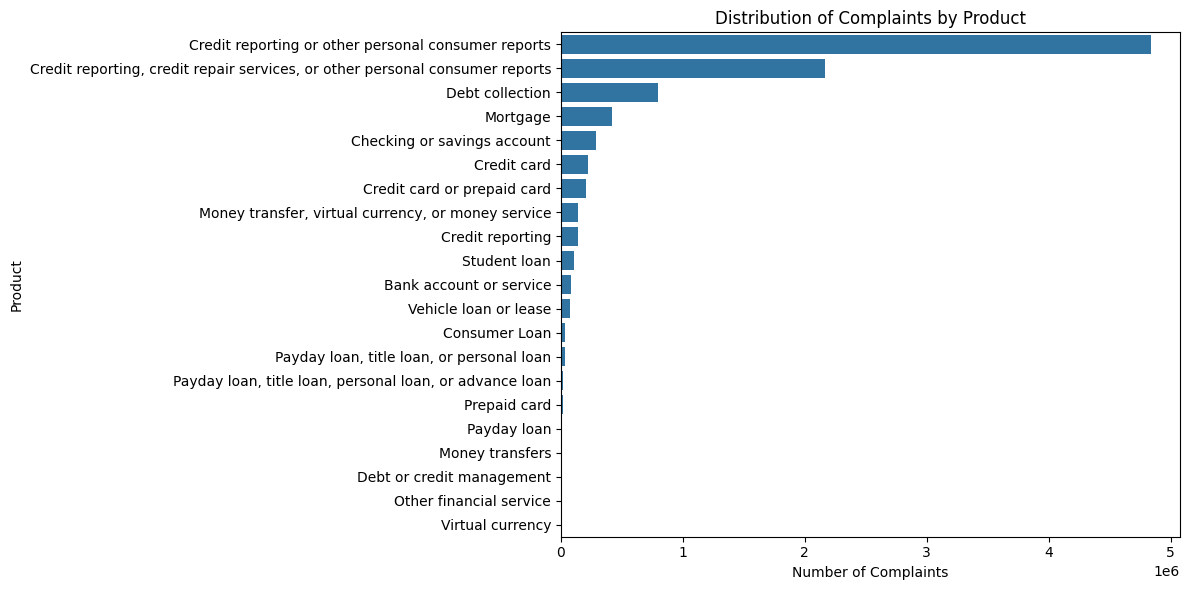


=== STEP 3: Narrative Length Analysis ===

--- Narrative Lengths (Consumer complaint narrative) ---
Min: 0, Max: 6469, Mean: 54.47


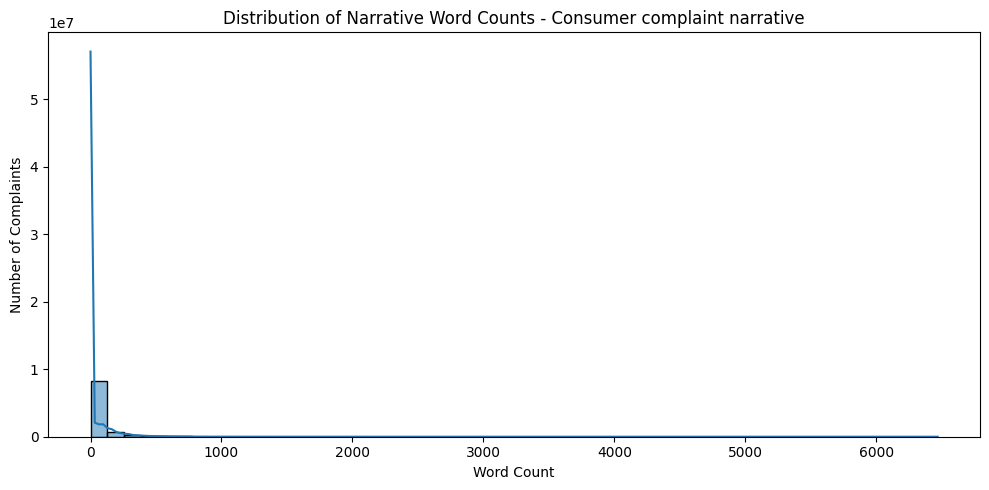


=== STEP 4: Narrative Presence Analysis ===

Complaints with narrative: 2980756
Complaints without narrative: 6629041

=== STEP 5: Data Filtering ===
Original dataset shape: (9609797, 18)
After filtering by products: 232040 records
After removing empty narratives: 82164 records

--- Product Distribution After Filtering ---
Credit card: 80667 complaints
Money transfers: 1497 complaints

Final filtered dataset shape: (82164, 18)
Filtered dataset shape: (82164, 18)

=== STEP 6: Text Cleaning ===
Cleaning narratives in column: Consumer complaint narrative
Original dataset shape: (82164, 18)
After cleaning: 82164 records

--- Text Cleaning Examples ---

Example 1:
Original: A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unaut...
Cleaned:  xxxx xxxx card was opened under my name by fraudster received notice from xxxx that an account was just ope

In [4]:
# Initialize the ComplaintAnalyzer with the loaded data
analyzer = ComplaintAnalyzer(complaints_df)

# Step 1: Perform initial EDA on the raw dataset
print("=== STEP 1: Initial Exploratory Data Analysis ===")
analyzer.initial_eda()

# Step 2: Visualize product distribution
print("\n=== STEP 2: Product Distribution Analysis ===")
analyzer.plot_product_distribution()

# Step 3: Analyze narrative lengths
print("\n=== STEP 3: Narrative Length Analysis ===")
analyzer.analyze_narrative_lengths()

# Step 4: Count narrative presence
print("\n=== STEP 4: Narrative Presence Analysis ===")
analyzer.count_narrative_presence()

# Step 5: Filter dataset to specific products and remove empty narratives
print("\n=== STEP 5: Data Filtering ===")
filtered_df = analyzer.filter_dataset()
print(f"Filtered dataset shape: {filtered_df.shape}")

# Step 6: Clean narratives for better embedding quality
print("\n=== STEP 6: Text Cleaning ===")
cleaned_df = analyzer.clean_narratives(filtered_df)
print(f"Cleaned dataset shape: {cleaned_df.shape}")

# Display final results
print("\n=== FINAL RESULTS ===")
print(f"Original dataset: {complaints_df.shape[0]} complaints")
print(f"After filtering: {filtered_df.shape[0]} complaints")
print(f"After cleaning: {cleaned_df.shape[0]} complaints")
print(f"Data reduction: {((complaints_df.shape[0] - cleaned_df.shape[0]) / complaints_df.shape[0] * 100):.1f}%")


///////////////////////////////////

# Data Processing Summary 
# 
 #### The following code provides a comprehensive summary of the data processing pipeline and outlines the next steps for analysis.
# 
#### Input: 
  - cleaned_df: The final processed dataset after filtering and cleaning
  - complaints_df: The original raw dataset for comparison
#### Output:
  - Summary statistics and data quality metrics
  - Processing pipeline overview
  - Recommendations for next analysis steps


In [5]:
# Save the cleaned dataset to CSV
output_path = "../data/complaints_processed.csv"
cleaned_df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

# Display summary of saved data
print(f"\n=== SAVED DATASET SUMMARY ===")
print(f"Shape: {cleaned_df.shape}")
print(f"Columns: {list(cleaned_df.columns)}")
print(f"Sample of first few rows:")
print(cleaned_df.head())

Cleaned dataset saved to: ../data/complaints_processed.csv

=== SAVED DATASET SUMMARY ===
Shape: (82164, 19)
Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Consumer complaint narrative_cleaned']
Sample of first few rows:
      Date received      Product                                 Sub-product  \
12237    2025-06-13  Credit card                           Store credit card   
13280    2025-06-12  Credit card  General-purpose credit card or charge card   
13506    2025-06-12  Credit card  General-purpose credit card or charge card   
13955    2025-06-09  Credit card  General-purpose credit card or charge card   
14249    2025-06-09  Credit card  General-purpose credit card or charge card   

         